In [1]:
import tensorflow as tf
import numpy as np
import re
import os

# Function to read and parse the tensor data from a text file
def parse_tensor_from_file(file_path, shape):
    with open(file_path, 'r') as file:
        # Read the content of the file
        tensor_str = file.read()
    components = re.findall(r"([+-]?\d+\.?\d*[eE]?[+-]?\d*(?:\s*[+-]?\d*\.?\d*[eE]?[+-]?\d*j)?)", tensor_str)

    # Convert the components into a numpy array of complex numbers
    complex_numbers = [complex(c.replace(' ','')) for c in components]

    # Convert the list to a NumPy array and reshape it
    numpy_tensor = np.array(complex_numbers, dtype=np.complex128)

    if (shape == 3):
        numpy_tensor = numpy_tensor.reshape(round(numpy_tensor.size ** (1/shape)),round(numpy_tensor.size ** (1/shape)),round(numpy_tensor.size ** (1/shape)))
    if (shape == 2):
        size = numpy_tensor.size
        new_shape = (round(size ** (1/shape)), round(size ** (1/shape))) if shape == 2 else (size,)
        numpy_tensor = numpy_tensor.reshape(new_shape)
    # Convert NumPy array to TensorFlow tensor
    tf_tensor = tf.convert_to_tensor(numpy_tensor)

    return tf_tensor
def retrieve_X_dict(base_dir):
     # Iterate through each subfolder in the base directory
     X_dict = {}

     for folder_name in os.listdir(base_dir):
        folder_path = os.path.join(base_dir, folder_name)
        if os.path.isdir(folder_path):
          # Path to the cost.txt file
          parts = folder_path.split('_')  # Split by underscore
          postfix = parts[-1]  # Get the last part
          
          rho2_file_path = os.path.join(folder_path, 'tr_rho2.txt')
          out_rho2_file_path = os.path.join(folder_path, 'tr_out_rho2.txt')
          if not os.path.exists(rho2_file_path):
              return X_dict
          #print(rho2_file_path, out_rho2_file_path)
          with open(rho2_file_path, 'r') as file:
               # Extract the complex number part using regular expression
               str_rho2 = file.read().strip()
               # Convert the extracted string to a complex number
               num_rho2 = abs(float(str_rho2))

          with open(out_rho2_file_path, 'r') as file:
               # Extract the complex number part using regular expression
               str_out_rho2 = file.read().strip()
               # Convert the extracted string to a complex number
               num_out_rho2 = abs(float(str_out_rho2))

          if "$\\rho'$"+" ("+postfix+")" not in X_dict:
               X_dict["$\\rho'$"+" ("+postfix+")"] = []
          if "$\\overline{\\rho'}$"+" ("+postfix+")" not in X_dict:
               X_dict["$\\overline{\\rho'}$"+" ("+postfix+")"] = []     
          X_dict["$\\rho'$"+" ("+postfix+")"].append((num_rho2))
          X_dict["$\\overline{\\rho'}$"+" ("+postfix+")"].append((num_out_rho2))
     return X_dict


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


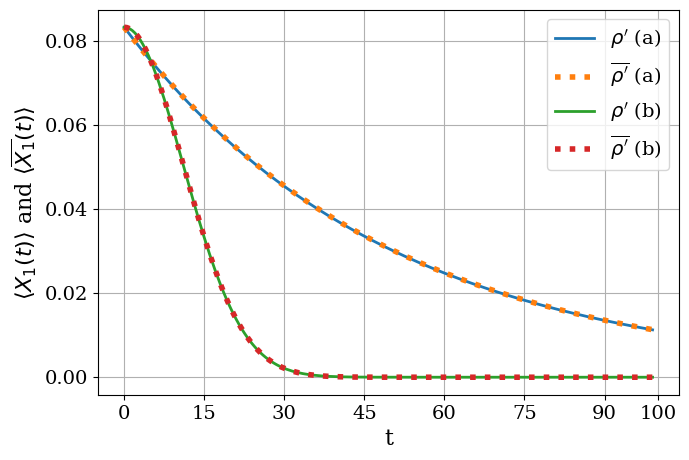

In [2]:
import matplotlib.pyplot as plt

def plot_dict (fidelity_dict, xlabel, ylabel, file_name, max, step, maxNum):
    # Plotting
    plt.rc('font', family='serif')
    plt.figure(figsize=(7.5, 5))

    # Plot each category
    i = 0
    for key, values in fidelity_dict.items():
        x = np.arange(len(values))  # Generate x-values
        if "overline" in key.lower():
            # Plot as lines for other keys
            plt.plot(
                x, values, label=key, linestyle=':', alpha=1, linewidth=4
            )
        else:
            # Plot as dots for keys containing 'unitary'
            plt.plot(
                x, values, label=key, linestyle='-', alpha=1, linewidth=2
            )
            

    # Adding title and labels
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)

    #plt.yscale('log')  # Set y-axis to logarithmic scale
    # Customizing x-axis ticks
    x_ticks = np.arange(0, max, step=step)  # Adjust step size based on your data
    if max-1 not in x_ticks:
        x_ticks = np.append(x_ticks, max-1)
    x_tick_labels = [f'{tick/(max-1)*maxNum:.0f}' for tick in x_ticks]  # Convert to float and format
    
    plt.xticks(ticks=x_ticks, labels=x_tick_labels)
    plt.xticks(fontsize=14) 
    plt.yticks(fontsize=14) 
    plt.grid(True)
    plt.legend(fontsize=14)
    
    plt.savefig('docs/'+file_name+'.png', format='png',  bbox_inches='tight')
    plt.savefig('docs/'+file_name+'.eps', format='eps',  bbox_inches='tight')
    

    # Display the plot
    plt.show()


trace_dict = retrieve_X_dict('experiment_result_X')
plot_dict(fidelity_dict=trace_dict, xlabel='t', ylabel="$\\langle X_1(t)\\rangle$ and $\\langle \\overline{X_1}(t)\\rangle$", file_name="trace_X", max=201, step=30, maxNum=100)